# Optimizing Fashion Sales for Clothing Retailer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
fashion = pd.read_csv('FyntraCustomerData.csv')

In [3]:
fashion.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
fashion.corr()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


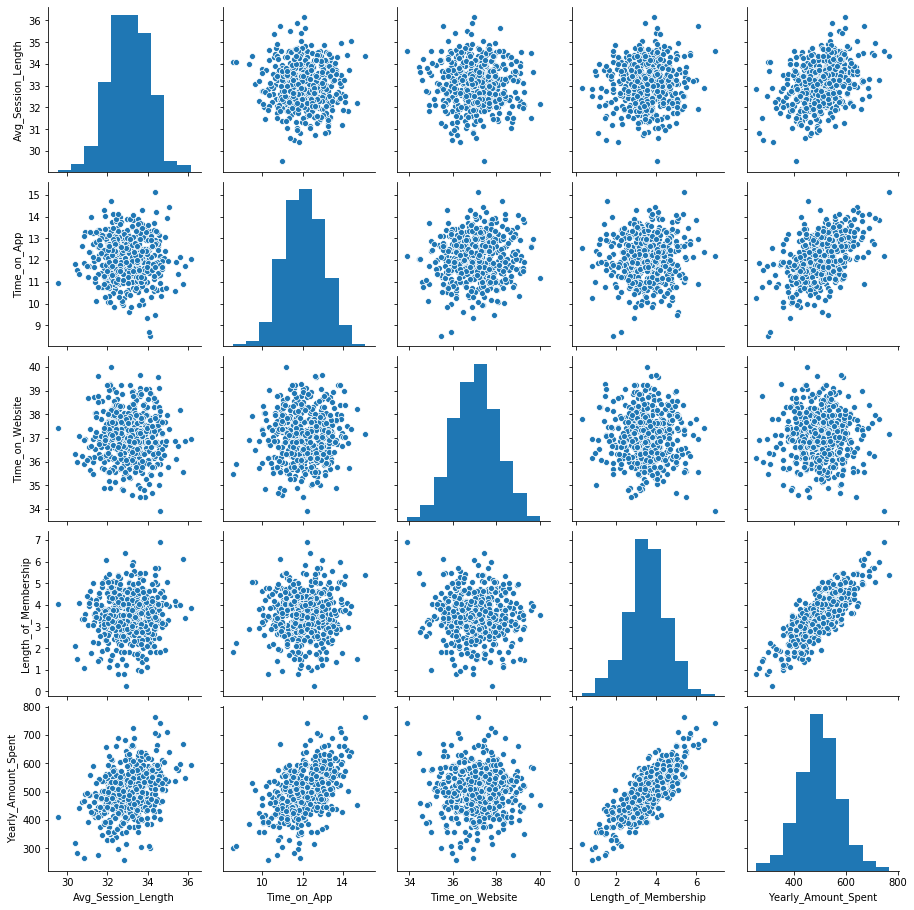

In [5]:
sns.pairplot(fashion)

There is no correlation between Time on Website and Length of Membership. However, there is a slight correlation between Time on App and Yearly Amount Spent.

Length of Membership is most correlated to Yearly Amount Spent.

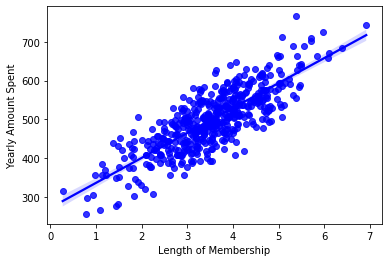

In [6]:
x, y = pd.Series(fashion['Length_of_Membership'], name="Length of Membership"), pd.Series(fashion['Yearly_Amount_Spent'], name="Yearly Amount Spent")

ax = sns.regplot(x = x, y = y, color="b")

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
#Extract response and predicted variables
y = fashion['Yearly_Amount_Spent']
x = fashion.drop(['Email', 'Address', 'Avatar', 'Yearly_Amount_Spent'], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

#Testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state = 10)

In [10]:
from sklearn.linear_model import LinearRegression
#Fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [11]:
#Predicting Y-values from test X
pred_y = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

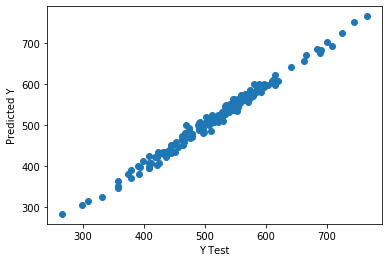

In [12]:
# Plot predicted y values against testing y values
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [13]:
#Calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_y)

91.09306312853433

In [14]:
#Calculate the regression coefficients
lm.coef_

array([25.84989997, 38.78684805,  0.90976755, 61.74381149])

Based on the coefficients, the company should focus on their mobile application more than their website because there is a higher regression coefficient value and is more predictive of the amount spent yearly by customers.